<a href="https://colab.research.google.com/github/Subhas-1130/Subhas-demo/blob/main/ML_1st_ASSIGNMENT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [29]:
# Load the Iris dataset (or use your dataset)
data = load_iris()
X = data.data
y = data.target

In [30]:
# Split dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Gaussian Naive Bayes
gnb = GaussianNB( priors=None, var_smoothing=1e-09)
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)

In [32]:
# Multinomial Naive Bayes (requires non-negative features)
mnb = MultinomialNB(alpha=1.0, force_alpha=True, fit_prior=True, class_prior=None)
mnb.fit(X_train, y_train)
y_pred_mnb = mnb.predict(X_test)

In [33]:
# Bernoulli Naive Bayes (requires binary features, so we'll modify the data)
X_train_bin = np.where(X_train > 0, 1, 0)  # Convert to binary
X_test_bin = np.where(X_test > 0, 1, 0)

bnb = BernoulliNB(alpha=1.0, force_alpha=True, binarize=0.0, fit_prior=True, class_prior=None)
bnb.fit(X_train_bin, y_train)
y_pred_bnb = bnb.predict(X_test_bin)

In [34]:
# Calculate metrics for each classifier
def calculate_metrics(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro', zero_division=0)
    recall = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    return accuracy, precision, recall, f1, cm

In [35]:
# Gaussian Naive Bayes metrics
acuracy_gnb, precision_gnb, recall_gnb, f1_gnb, cm_gnb = calculate_metrics(y_test, y_pred_gnb)
print("Gaussian Naive Bayes Results")
print(f"Accuracy: {accuracy_gnb:.4f}")
print(cf"Precision: {precision_gnb:.4f}")
print(f"Recall: {recall_gnb:.4f}")
print(f"F1-Score: {f1_gnb:.4f}")
print("Confusion Matrix:")
print(cm_gnb)

Gaussian Naive Bayes Results
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [36]:

# Multinomial Naive Bayes metrics
accuracy_mnb, precision_mnb, recall_mnb, f1_mnb, cm_mnb = calculate_metrics(y_test, y_pred_mnb)
print("\nMultinomial Naive Bayes Results")
print(f"Accuracy: {accuracy_mnb:.4f}")
print(f"Precision: {precision_mnb:.4f}")
print(f"Recall: {recall_mnb:.4f}")
print(f"F1-Score: {f1_mnb:.4f}")
print("Confusion Matrix:")
print(cm_mnb)


Multinomial Naive Bayes Results
Accuracy: 0.9000
Precision: 0.9167
Recall: 0.9091
F1-Score: 0.8997
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  3  8]]


In [37]:
# Bernoulli Naive Bayes metrics
accuracy_bnb, precision_bnb, recall_bnb, f1_bnb, cm_bnb = calculate_metrics(y_test, y_pred_bnb)
print("\nBernoulli Naive Bayes Results")
print(f"Accuracy: {accuracy_bnb:.4f}")
print(f"Precision: {precision_bnb:.4f}")
print(f"Recall: {recall_bnb:.4f}")
print(f"F1-Score: {f1_bnb:.4f}")
print("Confusion Matrix:")
print(cm_bnb)


Bernoulli Naive Bayes Results
Accuracy: 0.3000
Precision: 0.1000
Recall: 0.3333
F1-Score: 0.1538
Confusion Matrix:
[[ 0 10  0]
 [ 0  9  0]
 [ 0 11  0]]


In [38]:
# Split dataset into train and test sets (80% train, 20% test)
acc = []
splits = []
for i in range(1,6):
    # print(i/10)
    splits.append(i/10)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=i/10, random_state=42)
    gnb = GaussianNB( priors=None, var_smoothing=1e-09)
    gnb.fit(X_train, y_train)
    y_pred_gnb = gnb.predict(X_test)
    acuracy_gnb, precision_gnb, recall_gnb, f1_gnb, cm_gnb = calculate_metrics(y_test, y_pred_gnb)
    print("Gaussian Naive Bayes Results")
    print(f"Accuracy: {accuracy_gnb:.4f}")
    print(f"Precision: {precision_gnb:.4f}")
    print(f"Recall: {recall_gnb:.4f}")
    print(f"F1-Score: {f1_gnb:.4f}")
    print("Confusion Matrix:")
    print(cm_gnb)
    acc.append(accuracy_gnb)

Gaussian Naive Bayes Results
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[6 0 0]
 [0 6 0]
 [0 0 3]]
Gaussian Naive Bayes Results
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1-Score: 1.0000
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Gaussian Naive Bayes Results
Accuracy: 1.0000
Precision: 0.9762
Recall: 0.9744
F1-Score: 0.9743
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]
Gaussian Naive Bayes Results
Accuracy: 1.0000
Precision: 0.9639
Recall: 0.9639
F1-Score: 0.9639
Confusion Matrix:
[[23  0  0]
 [ 0 18  1]
 [ 0  1 17]]
Gaussian Naive Bayes Results
Accuracy: 1.0000
Precision: 0.9861
Recall: 0.9855
F1-Score: 0.9855
Confusion Matrix:
[[29  0  0]
 [ 0 23  0]
 [ 0  1 22]]


<BarContainer object of 5 artists>

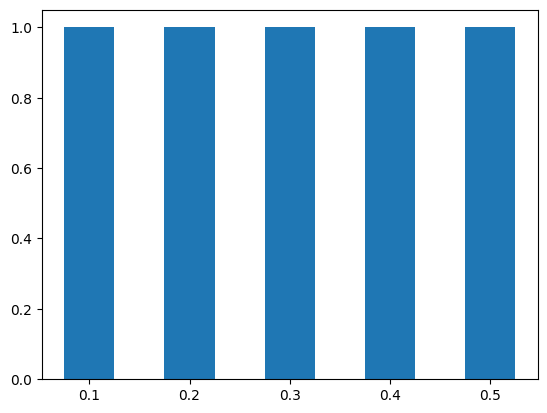

In [39]:
import matplotlib.pyplot as plt
plt.bar(splits,acc,width=0.05)